# Image convolution

Based on https://medium.com/swlh/image-processing-with-python-convolutional-filters-and-kernels-b9884d91a8fd

In this post, we will explore how the image filters or kernels can be used to blur, sharpen, outline and emboss features in an image by using just math and code.

Let’s begin.

As usual, we import libraries such as numpy and matplotlib. Additionally, we import specific functions from the skimage and scipy.signal library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

C:\Users\Cliente\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


But first, what is a filter or a kernel?

Simply put, these are matrices can are applied to an image to apply image effects which can be done through the mathematical operation known as convolution. This is the process of adding each pixel of the image to its local neighbors, weighted by the kernel. Let’s illustrate this thought.

![image](im1.png)

The values of a pixel in the resulting image are calculated by multiplying each kernel value by the corresponding input image pixel values. This process is iterated until the kernel has completed iterating this multiplication in the entirety of the input image. This is visually represented below:

![image](im2.png)

Now that we have an idea of what filters and convolution are, let’s try this concept on an actual image.

shape of image is (4632, 3474, 3)


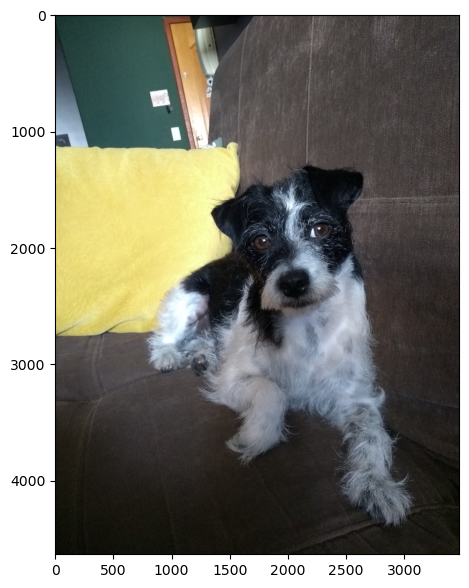

In [2]:
my_dog = imread('flor2.jpg')
plt.figure(figsize = (10,7))
plt.imshow(my_dog, cmap='gray');
print("shape of image is {}".format(my_dog.shape))

To ensure that the effects of the filters and kernels are visually evident, let us rescale the image down to 10% of its original size.

shape of image is (463, 347, 3)


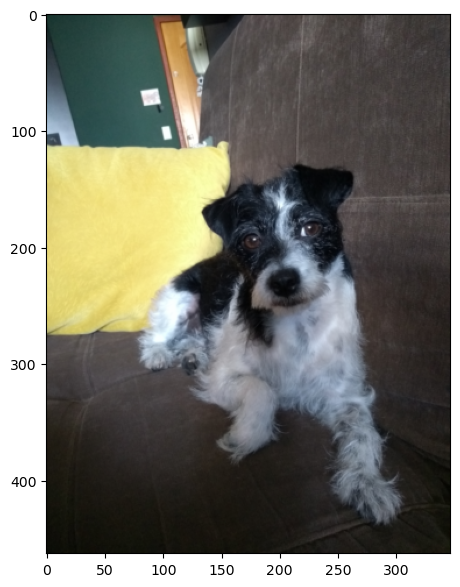

In [3]:
r_scaled = rescale(my_dog[:,:,0], 0.10)
g_scaled = rescale(my_dog[:,:,1], 0.10)
b_scaled = rescale(my_dog[:,:,2], 0.10)
my_dog_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
my_dog_gray = rescale(rgb2gray(my_dog), 0.10)

plt.figure(figsize = (10,7))
plt.imshow(my_dog_scaled, cmap='gray');
print("shape of image is {}".format(my_dog_scaled.shape))

We have also defined a function that will apply the convolution function in all channels of the image, as shown below:

In [4]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

Now, let’s try to apply the identity filter to the image of my dog.

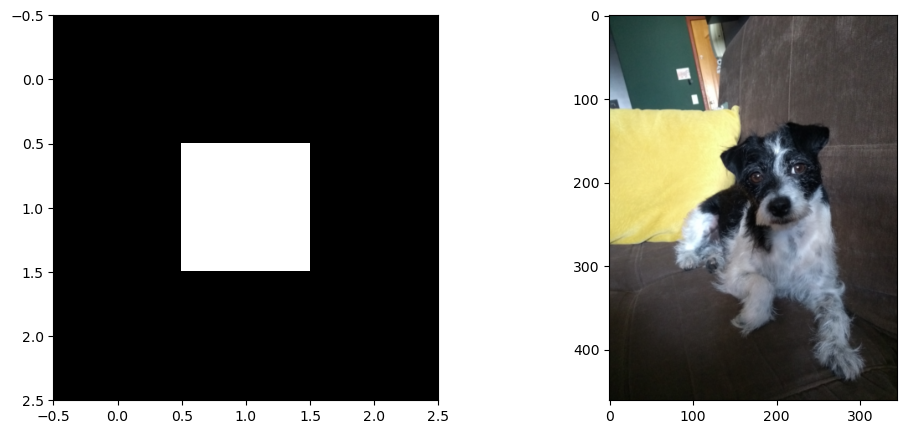

In [5]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])

conv_im1 = rgb_convolve2d(my_dog_scaled, identity)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(identity, cmap='gray')
ax[1].imshow(abs(conv_im1), cmap='gray');

As expected, nothing happens! As the filter’s name suggests, the identity kernel will return the input image itself.

Now, let’s try edge detection filters on the grayscale image of my dog.

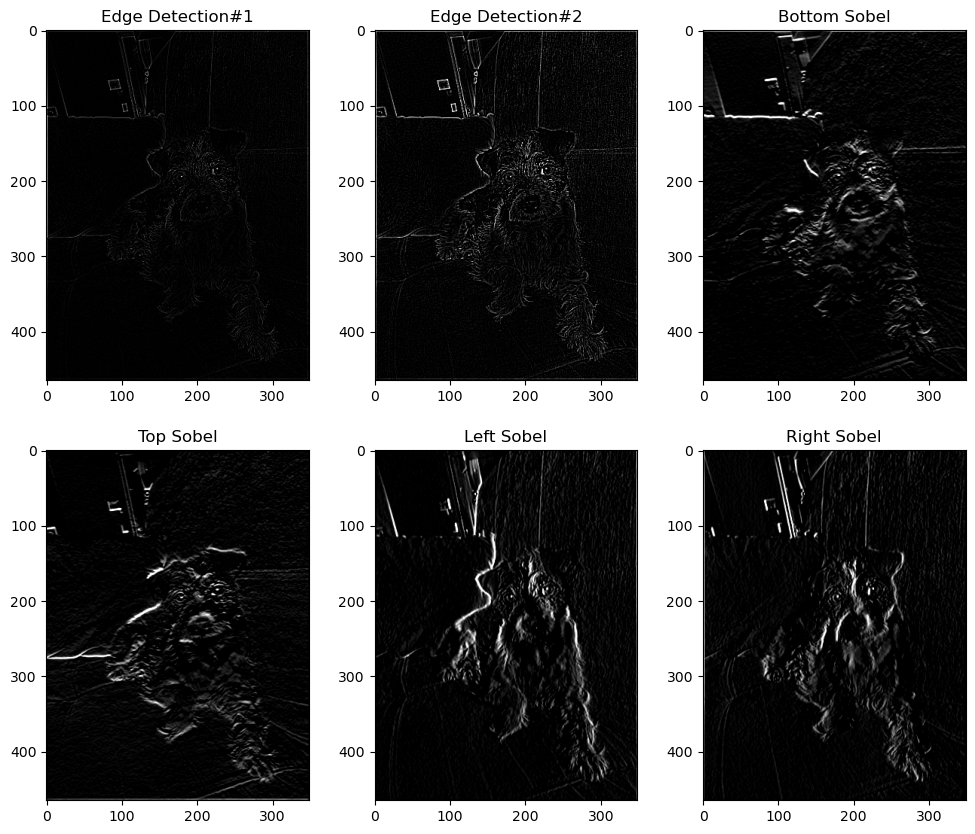

In [6]:
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection#1', 'Edge Detection#2', 
               'Bottom Sobel', 'Top Sobel', 
               'Left Sobel', 'Right Sobel']

figure, axis = plt.subplots(2,3, figsize=(12,10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(my_dog_gray, 
                           kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)

Looking at the resulting images, we can see that the edge detection just finds the region where there is a sharp change in intensity or change in color. A high value indicates a sharp change, while a low value indicates a shallow change. Moreover, the Sobel operators are comparable with the edge detection — with the difference that it has a specific direction. For example, the bottom Sobel emphasizes the edges on the bottom part of the object, and vice versa.

Now, let’s try other types of kernel operators on the original image of my dog.

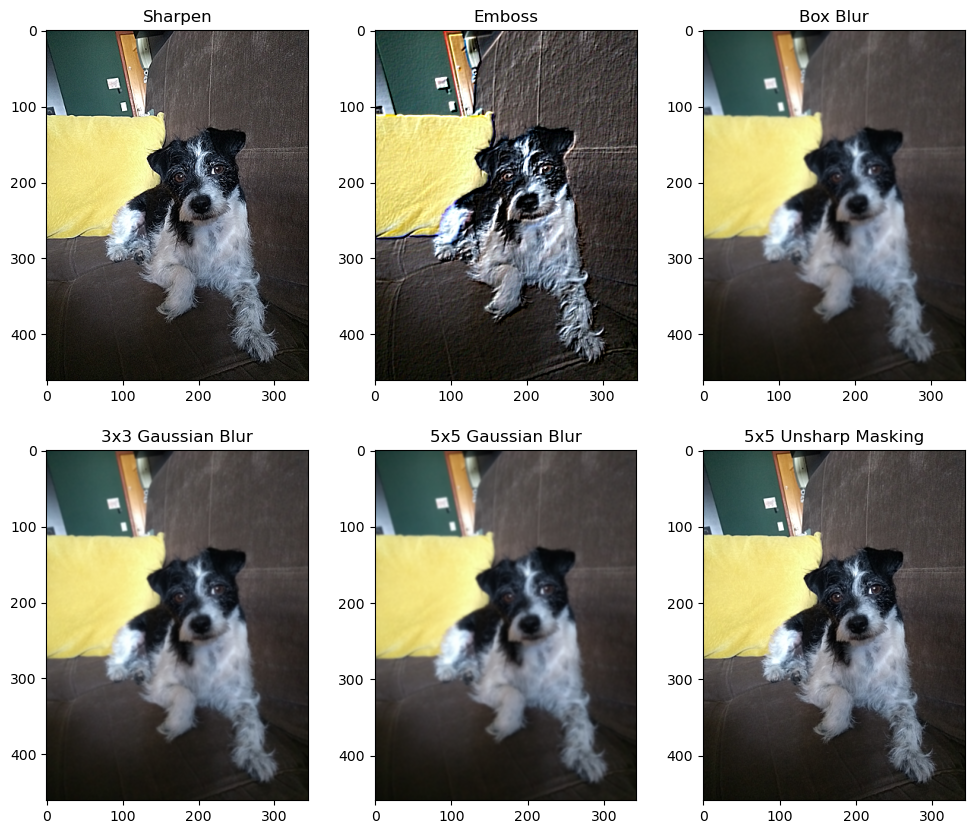

In [7]:
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Gaussian Blur 5x5
kernel11 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
# Unsharp masking 5x5
kernel12 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
kernels = [kernel7, kernel8, kernel9, kernel10, kernel11, kernel12]
kernel_name = ['Sharpen', 'Emboss', 'Box Blur', 
               '3x3 Gaussian Blur', '5x5 Gaussian Blur', 
               '5x5 Unsharp Masking']
figure, axis = plt.subplots(2,3, figsize=(12,10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = rgb_convolve2d(my_dog_scaled, 
                               kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)

I am sure that we are all familiar with these filters since these are typically available on our smartphone cameras — so I will no longer be expounding on what each filter does. I will highlight how the sharpen and 5x5 unsharp masking filters were able to improve the image quality from the input image used. This only shows the capabilities of convolutional filters in manipulating the limited information available on the images provided to it.

NOTE: When using the convolve2d function of scipy, it should be noted that scipy inverts the kernel before applying the convolution. This information is vital since some of the filters that we used is direction specific (such as the Sobel operator). Therefore, the kernels need to be inverted before applying the convolve2d function. Fun fact: if you are familiar with the tensorflow library, the convolution function in that library does not invert the kernels before applying the convolution operation.

In summary

We have explored how we can use convolutional filters to preprocess the images to achieve our desired effects. We can apply various effects on the image through the convolutional operation such as edge detection, blur, sharpen and emboss. Now, we have a high-level understanding of how our smartphones do these things!

# Let's try with a pressure field

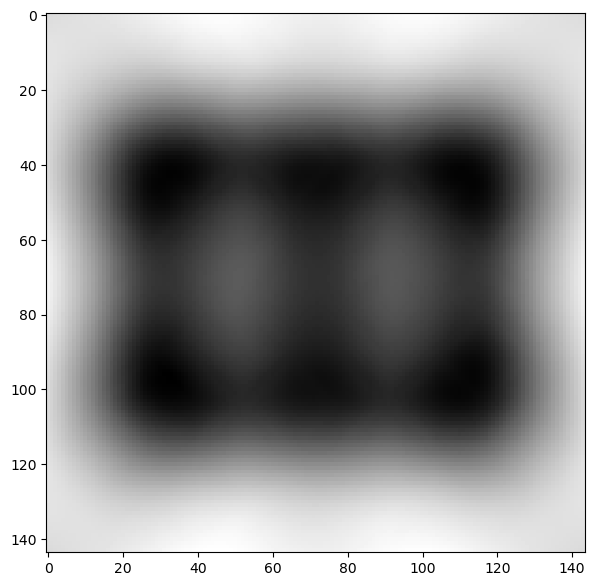

In [8]:
p_field = np.load('pressure_field.npy')
p_field = p_field/np.amax(np.abs(p_field))
#p_field = p_field[30:110, 40:100]

plt.figure(figsize = (10,7))
plt.imshow(p_field, cmap='gray');

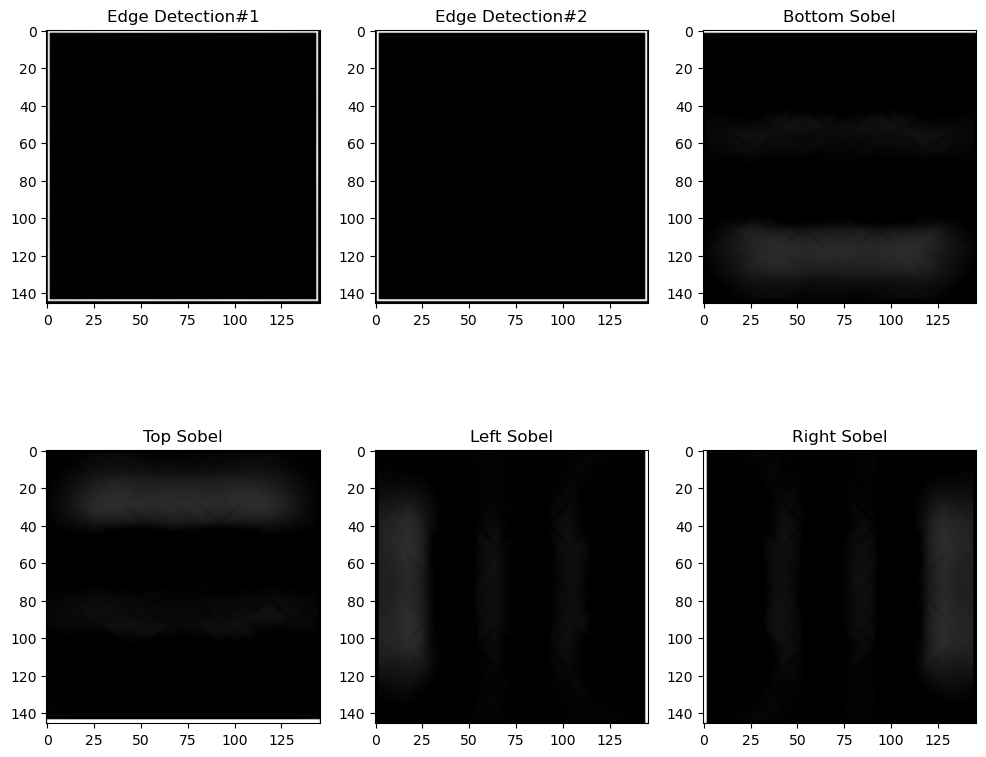

In [9]:
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection#1', 'Edge Detection#2', 
               'Bottom Sobel', 'Top Sobel', 
               'Left Sobel', 'Right Sobel']

figure, axis = plt.subplots(2,3, figsize=(12,10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(p_field, 
                           kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)